### Estimates of plastic use in California

Estimates of plastic use by crop type and plastic type (drip tape, hoop house, plastic mulch) using: 
* ERG project estimates of plastic use by type and crop (per acre I believe)
* CA DWR's 2019 crop mapping dataset: https://gis.data.ca.gov/datasets/363c00277ad74c4ba4f64238edc5430c_0/about

Modified 6/13/24 AT to fix up file paths, clean up the outputs, add metadata

-------

Requirement:
    
name input shp files following this syntax - crop (plastic category)

example: "Avocados (drip tape).shp"
    
the "crop_type" column in "input_from_ERG.csv" should follow the same syntaxt, such as "Avocados".

In [17]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import glob
import os

# 1. Load data

In [18]:
# Specify the folder path
folder_path = "data/i15_Crop_Mapping_2019_extracted"
# os.makedirs("output", exist_ok=True)
# os.makedirs("output/shp", exist_ok=True)
# os.makedirs("output/map", exist_ok=True)

# Find all .shp files in the folder
shp_files = glob.glob(os.path.join(folder_path, "*.shp"))

# Get each file name (without the .shp) and put them in a list
crop_list_shp = [os.path.splitext(os.path.basename(file))[0] for file in shp_files]

# Now file_names is a list of all file names without the .shp
print(crop_list_shp)

['Alfalfa_and_alfalfa_mixtures', 'Almonds (drip tape)', 'Apples', 'Avocados (drip tape)', 'Bushberries (drip tape)', 'Bushberries (hoop house)', 'Cherries', 'Flowers_T16', 'Greenhouse_T27', 'Lemons (drip tape)', 'Melons_Squash_Cucumbers_T9', 'Olives (drip tape)', 'Onions_and_Garlic', 'Oranges (drip tape)', 'Peaches_and_Nectarines', 'Pears', 'Pepers_T21', 'Pistachios (drip tape)', 'Potatoes', 'Prunes (drip tape)', 'Rice', 'Strawberries (drip tape)', 'Strawberries (plastic mulch)', 'Sunflowers (drip tape)', 'T', 'Walnuts (drip tape)', 'Wheat (drip tape)']


In [3]:
df_crop = pd.read_csv("data/input_from_ERG.csv").sort_values('cost_per_acre', ascending=False)
df_crop['crop'] = df_crop['crop_type']+' ('+df_crop['plastic_categories']+')'
df_crop.set_index('crop', inplace=True)
df_crop

# notice that strawberry is special, it has both cost data for mulch and drip tape
# ERG data has a Nan in Wheat

,crop_type,plastic_categories,price_per_unit_max,plastic_lbs_unit,cost_per_acre
crop,,,,,
Bushberries (hoop house),Bushberries,hoop house,0.025023,0.004833,4969
Avocados (drip tape),Avocados,drip tape,0.039228,0.014783,2600
Strawberries (drip tape),Strawberries,drip tape,0.039228,0.014783,2245
Lemons (drip tape),Lemons,drip tape,0.039228,0.014783,2052
Almonds (drip tape),Almonds,drip tape,0.039228,0.014783,2000
Olives (drip tape),Olives,drip tape,0.039228,0.014783,1800
Sunflowers (drip tape),Sunflowers,drip tape,0.039228,0.014783,900
Pistachios (drip tape),Pistachios,drip tape,0.039228,0.014783,700
Walnuts (drip tape),Walnuts,drip tape,0.039228,0.014783,600


In [4]:
plastic_category_list = df_crop['plastic_categories'].unique()
plastic_category_list

array(['hoop house', 'drip tape', 'plastic mulch'], dtype=object)

In [5]:
crop_list_cost = df_crop.index.to_list()
crop_list_cost

['Bushberries (hoop house)',
 'Avocados (drip tape)',
 'Strawberries (drip tape)',
 'Lemons (drip tape)',
 'Almonds (drip tape)',
 'Olives (drip tape)',
 'Sunflowers (drip tape)',
 'Pistachios (drip tape)',
 'Walnuts (drip tape)',
 'Prunes (drip tape)',
 'Bushberries (drip tape)',
 'Strawberries (plastic mulch)',
 'Oranges (drip tape)',
 'Wheat (drip tape)']

In [6]:
crop_list = list(set(crop_list_shp).intersection(set(crop_list_cost)))
crop_list = sorted(crop_list)
# # test
# crop_list = ['Strawberries (drip tape)','Strawberries (plastic mulch)', 'Almonds (drip tape)'] # wheat does not have weight data


In [7]:
# for crop in crop_list:
#     plastic_lbs_unit = df_crop.loc[crop, 'plastic_lbs_unit']
#     cost_per_acre = df_crop.loc[crop, 'cost_per_acre']
#     price_per_unit_max = df_crop.loc[crop, 'price_per_unit_max']

## test
# plastic_lbs_unit = 0.01125
# cost_per_acre = 363
# price_per_unit_max = 0.013303125

In [8]:
boundary_county_path = "data/CA_Counties/CA_Counties_TIGER2016.shp"
# Read the shapefile
boundary_county_CA = gpd.read_file(boundary_county_path)
# Check the Coordinate Reference System (CRS)
print(boundary_county_CA.crs)

EPSG:3857


# 2. Aggregation and mapping

In [15]:
def AgPlasticAggregation(crop, crop_para, boundary_county):
    # Read the shapefile
    shapefile_path = f"data/i15_Crop_Mapping_2019_extracted/{crop}.shp"
    gdf = gpd.read_file(shapefile_path)
    # Check the Coordinate Reference System (CRS)
    print(gdf.crs)

    # calculation for plastic usage
    plastic_lbs_unit = crop_para.loc[crop, 'plastic_lbs_unit']
    cost_per_acre = crop_para.loc[crop, 'cost_per_acre']
    price_per_unit_max = crop_para.loc[crop, 'price_per_unit_max']
    gdf['Plastic_Usage'] = ((cost_per_acre*(1/(price_per_unit_max*1.0725))*gdf['ACRES']))*(1/43560) # acres
    gdf['Plastic_Weight'] = ((cost_per_acre*(1/(price_per_unit_max*1.0725))*gdf['ACRES'])*plastic_lbs_unit)*(1/2000) # tons
    gdf.to_file(f'output/shp/Plastic_Usage_{crop}.shp') # save as shp
    
    # Group by 'COUNTY' and calculate the sum of three columns for each county
    grouped_gdf_county = gdf.groupby(['COUNTY'])[['ACRES', "Plastic_Usage", "Plastic_Weight"]].sum()
    grouped_gdf_county['Plastic_type'] = crop_para.loc[crop, 'plastic_categories'] # note the type
    grouped_gdf_county.columns = [
        f'ACRES_{crop}',
        f'Plastic_Usage_{crop}',
        f'Plastic_Weight_{crop}',
        f'Plastic_Category_{crop}']
    
    return grouped_gdf_county

In [10]:
# plastic_county = AgPlasticAggregation('Strawberries (drip tape)', df_crop, boundary_county_CA)
# plastic_county

In [11]:
# def AgPlasticMappingCounty(grouped_gdf_county, boundary_county):    
#     # Merge the dataframes
#     merged_gdf = boundary_county.merge(grouped_gdf_county, left_on='NAME', right_on='COUNTY', how='left')
#     # merged_gdf

#     total_acres_of_crop = grouped_gdf_county[f'ACRES_{crop}'].sum().round(2)
#     total_acres_of_plastic = grouped_gdf_county[f'Plastic_Usage_{crop}'].sum().round(2)
#     total_tons_of_plastic = grouped_gdf_county[f'Plastic_Weight_{crop}'].sum().round(2)

#     # Format your paragraph
#     report_result = f"""
#     Result: (1) Total acres of {crop}: {total_acres_of_crop:,.2f}; (2) Total acres of plastic: {total_acres_of_plastic:,.2f}; (3) Total tons of plastic: {total_tons_of_plastic:,.2f}.
#     """

#     # Create a figure with 3 subplots (1 row, 3 columns)
#     fig, axs = plt.subplots(1, 3, figsize=(15, 5))

#     # Set a major title for the whole figure
#     fig.suptitle(f"Plastic Usage of Growing {crop} in California", fontsize=16, fontweight='bold')

#     # Plot the GeoDataFrame based on the 'ACRES' column on the first axes
#     merged_gdf.plot(column=f'ACRES_{crop}', cmap='YlOrRd', linewidth=0.8, ax=axs[0], edgecolor='0.8', legend=True)
#     boundary_county.boundary.plot(ax=axs[0], color='grey')
#     axs[0].set_title('Crop Acre')

#     # Plot the GeoDataFrame based on the 'GEOID' column on the second axes
#     merged_gdf.plot(column=f'Plastic_Usage_{crop}', cmap='YlOrRd', linewidth=0.8, ax=axs[1], edgecolor='0.8', legend=True)
#     boundary_county.boundary.plot(ax=axs[1], color='grey')
#     axs[1].set_title('Plastic Usage (acre)')

#     # Plot the GeoDataFrame based on the 'GEOID' column on the second axes
#     merged_gdf.plot(column=f'Plastic_Weight_{crop}', cmap='YlOrRd', linewidth=0.8, ax=axs[2], edgecolor='0.8', legend=True)
#     boundary_county.boundary.plot(ax=axs[2], color='grey')
#     axs[2].set_title('Plastic Weight (ton)')

#     # Add a note at the bottom of the figure
#     plt.figtext(0.5, 0.01, report_result, ha="center", fontsize=10, bbox={"facecolor":"lightgrey", "alpha":0.5, "pad":5})

#     # Adjust the subplot parameters to make room for the note
#     plt.subplots_adjust(bottom=0.2)  # Adjusts the bottom parameter. Change this to fit your needs.

#     plt.savefig(f'output/map/Plastic_Mapping_{crop}.jpg', dpi=300, bbox_inches='tight', format='jpeg')

#     # Show the plot
#     plt.show()

In [12]:
def AgPlasticMappingCounty(grouped_gdf_county, boundary_county):    
    # Merge the dataframes
    merged_gdf = boundary_county.merge(grouped_gdf_county, left_on='NAME', right_on='COUNTY', how='left')
    # merged_gdf

    total_acres_of_crop = grouped_gdf_county[f'ACRES_{crop}'].sum().round(2)
    total_acres_of_plastic = grouped_gdf_county[f'Plastic_Usage_{crop}'].sum().round(2)
    total_tons_of_plastic = grouped_gdf_county[f'Plastic_Weight_{crop}'].sum().round(2)

    # Format your paragraph
#     report_result = f"""
#     Result: (1) Total acres of {crop}: {total_acres_of_crop:,.2f}; (2) Total acres of plastic: {total_acres_of_plastic:,.2f}; (3) Total tons of plastic: {total_tons_of_plastic:,.2f}.
#     """
    report_result = f"""
        Total tons of plastic: {total_tons_of_plastic:,.2f}.
        """

    # Create a figure with 3 subplots (1 row, 3 columns)
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))

    # Set a major title for the whole figure
#     fig.suptitle(f"Plastic Usage of Growing {crop} in California", fontsize=16, fontweight='bold')

    # Plot the GeoDataFrame based on the 'GEOID' column on the second axes
    merged_gdf.plot(column=f'Plastic_Weight_{crop}', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    boundary_county.boundary.plot(ax=ax, color='grey')
    ax.set_title(f'Plastic Usage of Growing {crop} in California (ton)')

    # Add a note at the bottom of the figure
    plt.figtext(0.5, 0.05, report_result, ha="center", fontsize=10, bbox={"facecolor":"lightgrey", "alpha":0.5, "pad":5})
    # Adjust the subplot parameters to make room for the note
#     plt.subplots_adjust(bottom=0.2)  # Adjusts the bottom parameter. Change this to fit your needs.

    # plt.savefig(f'output/map/Plastic_Mapping_{crop}.jpg', dpi=300, bbox_inches='tight', format='jpeg')

    # Show the plot
    plt.show()

## 2.1 Map: county-level

### Mapped crop types

In [13]:
print(crop_list)

['Almonds (drip tape)', 'Avocados (drip tape)', 'Bushberries (drip tape)', 'Bushberries (hoop house)', 'Lemons (drip tape)', 'Olives (drip tape)', 'Oranges (drip tape)', 'Pistachios (drip tape)', 'Prunes (drip tape)', 'Strawberries (drip tape)', 'Strawberries (plastic mulch)', 'Sunflowers (drip tape)', 'Walnuts (drip tape)', 'Wheat (drip tape)']


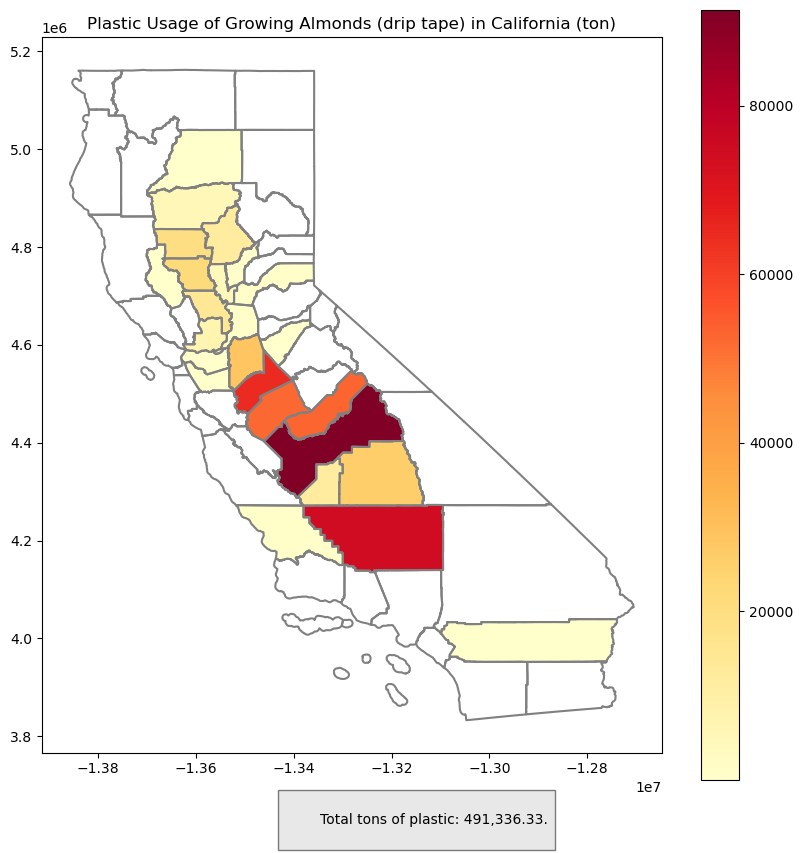

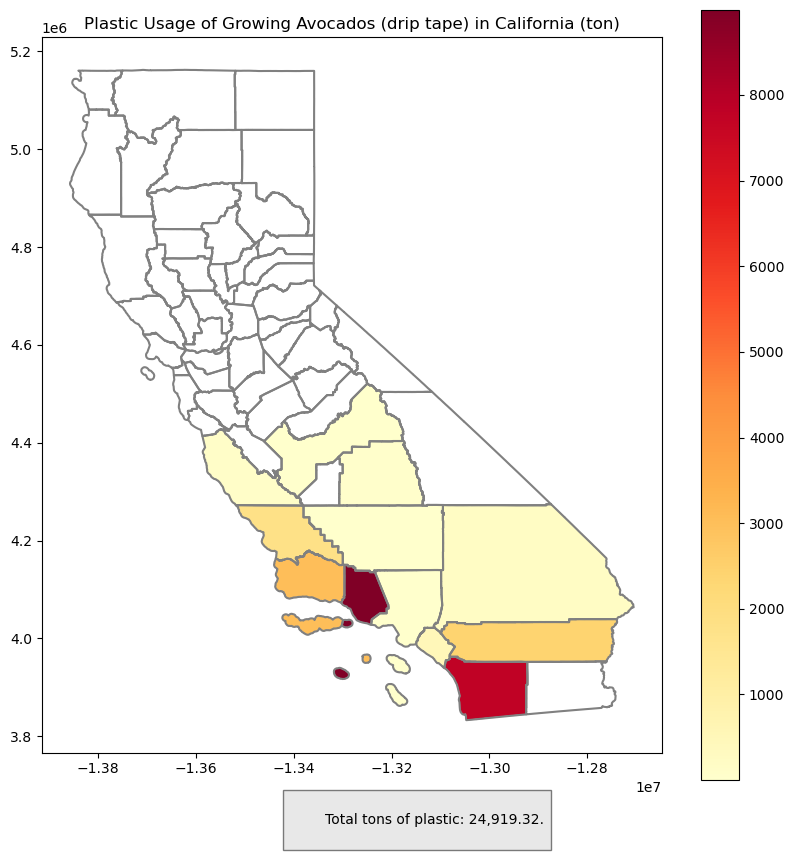

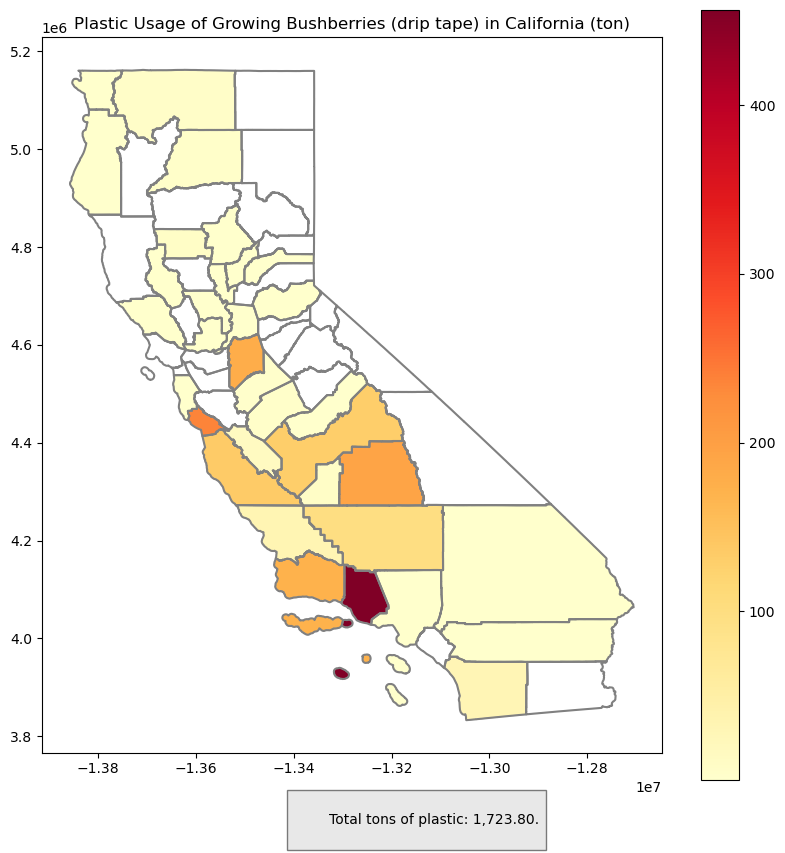

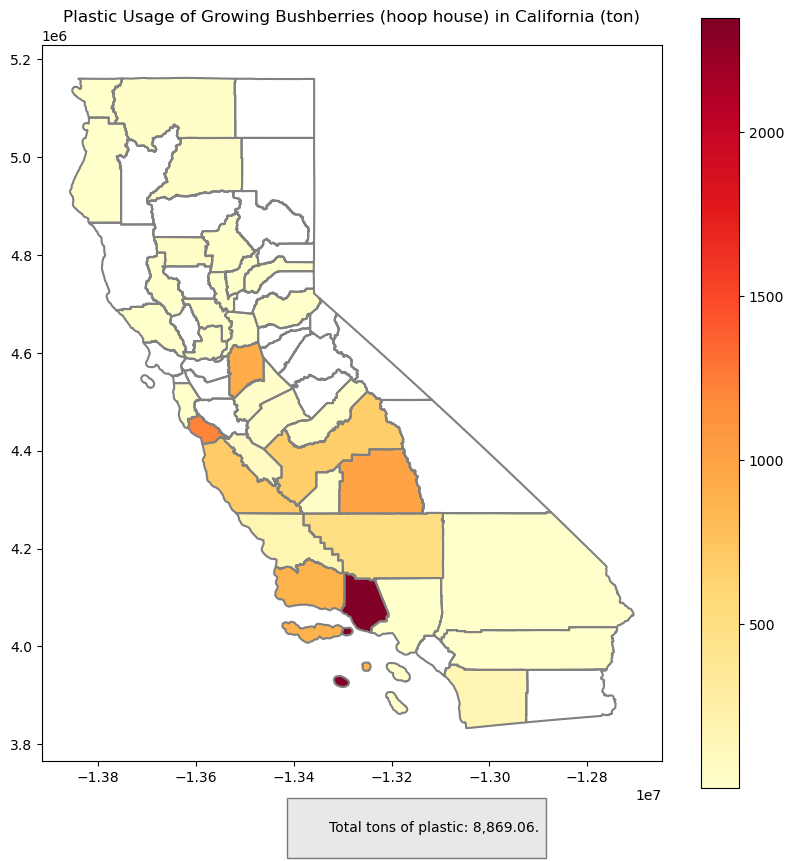

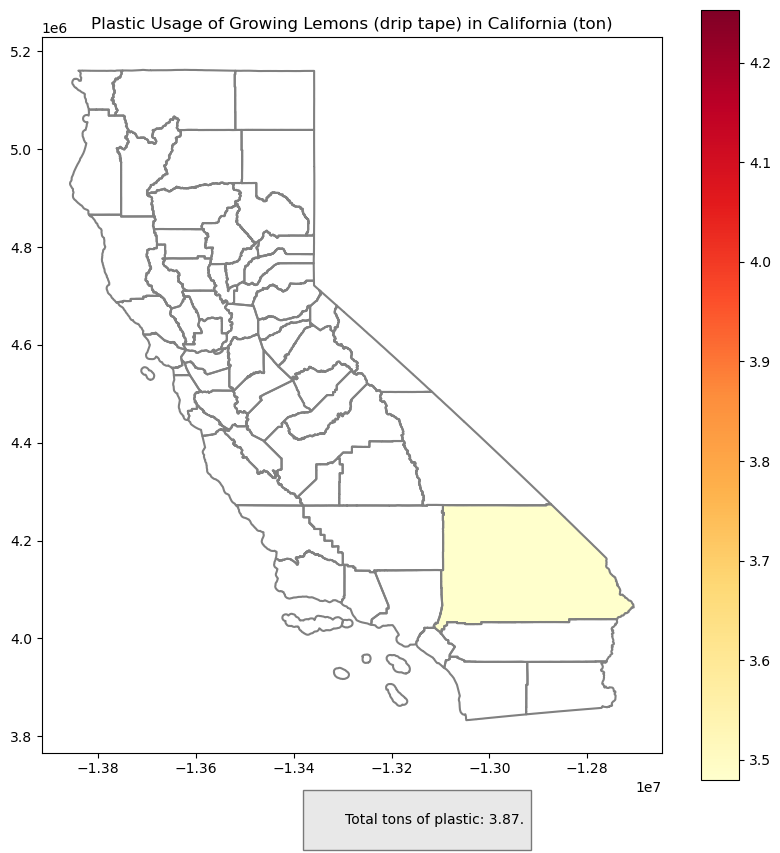

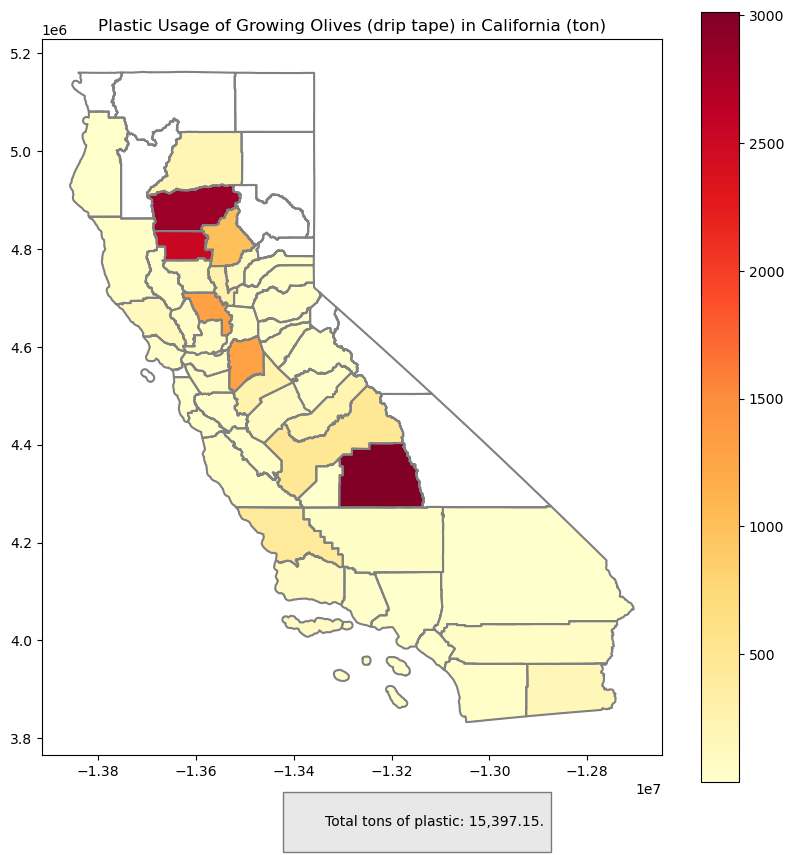

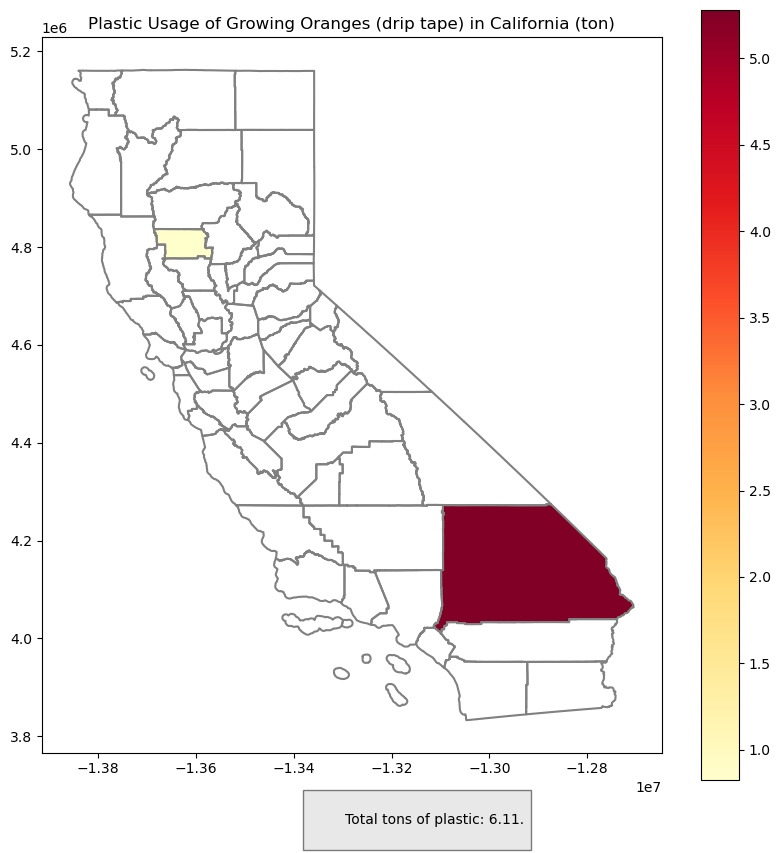

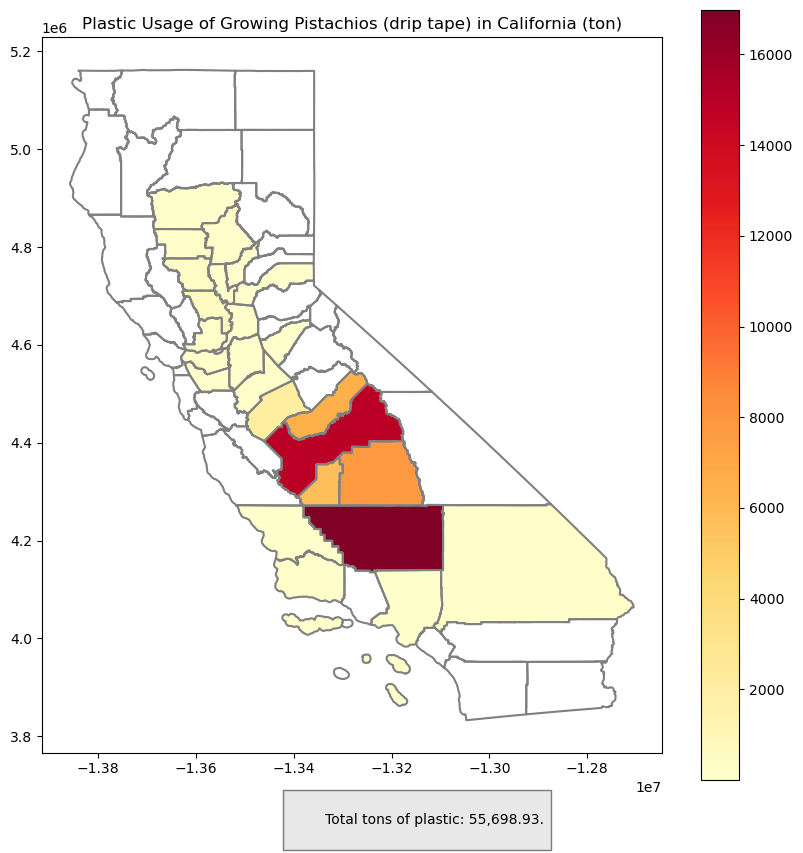

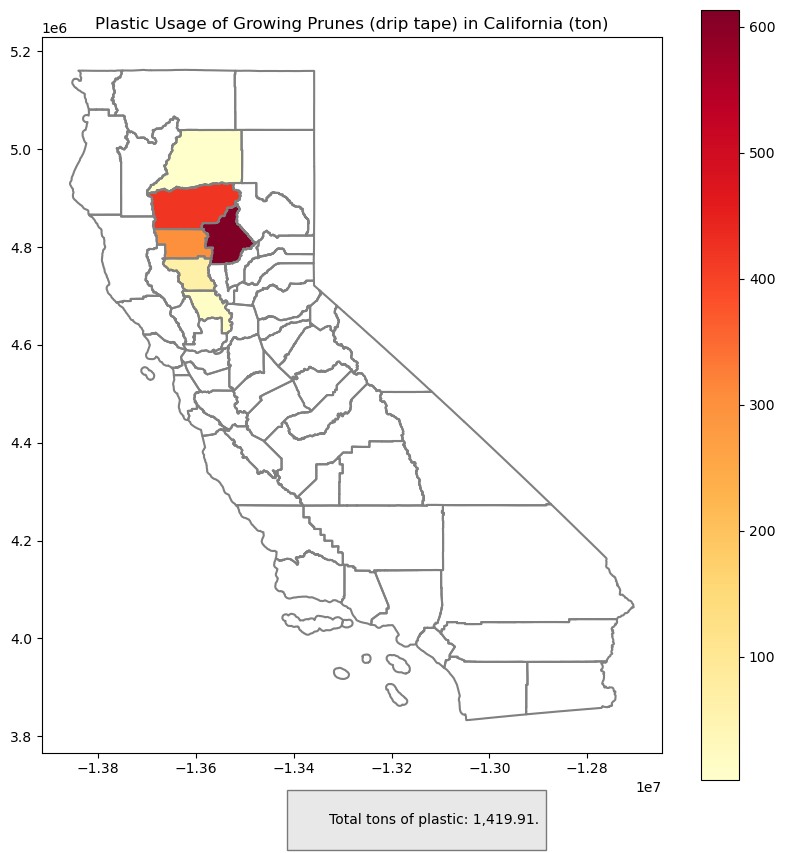

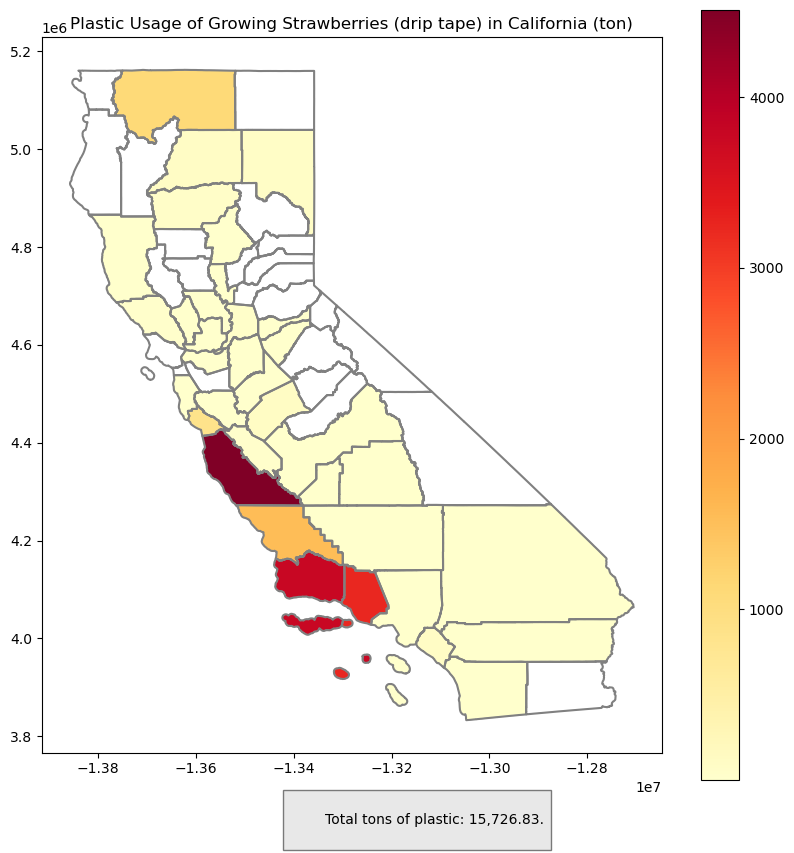

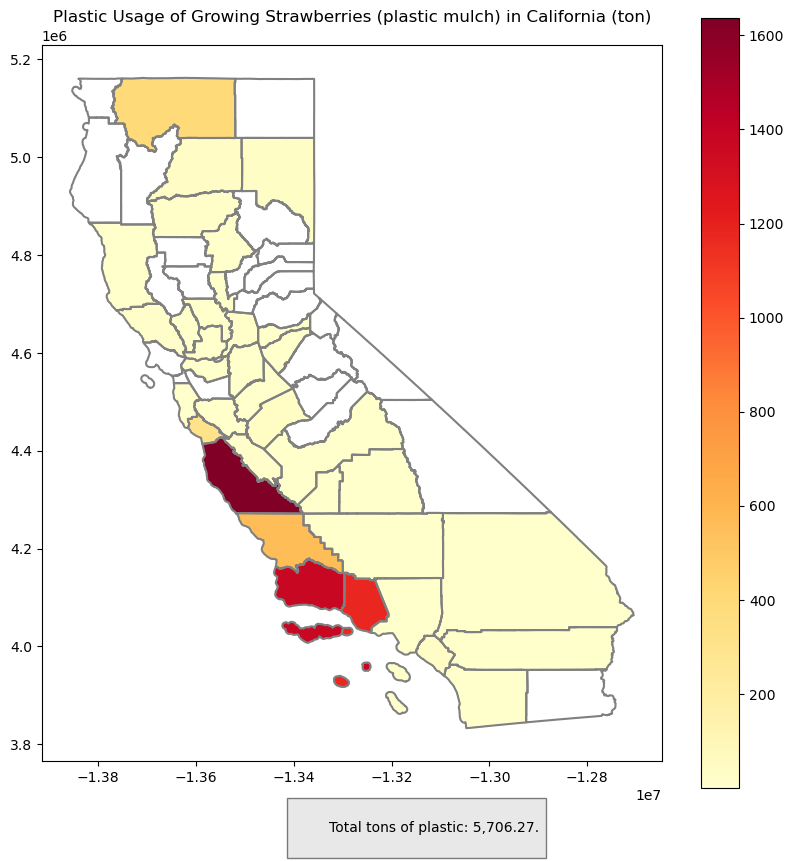

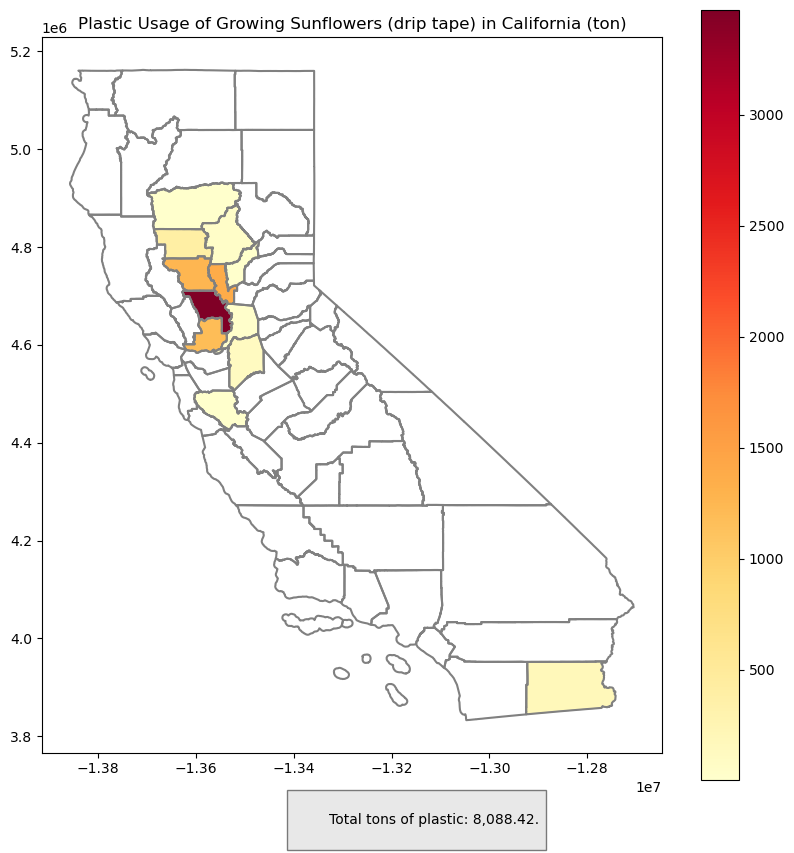

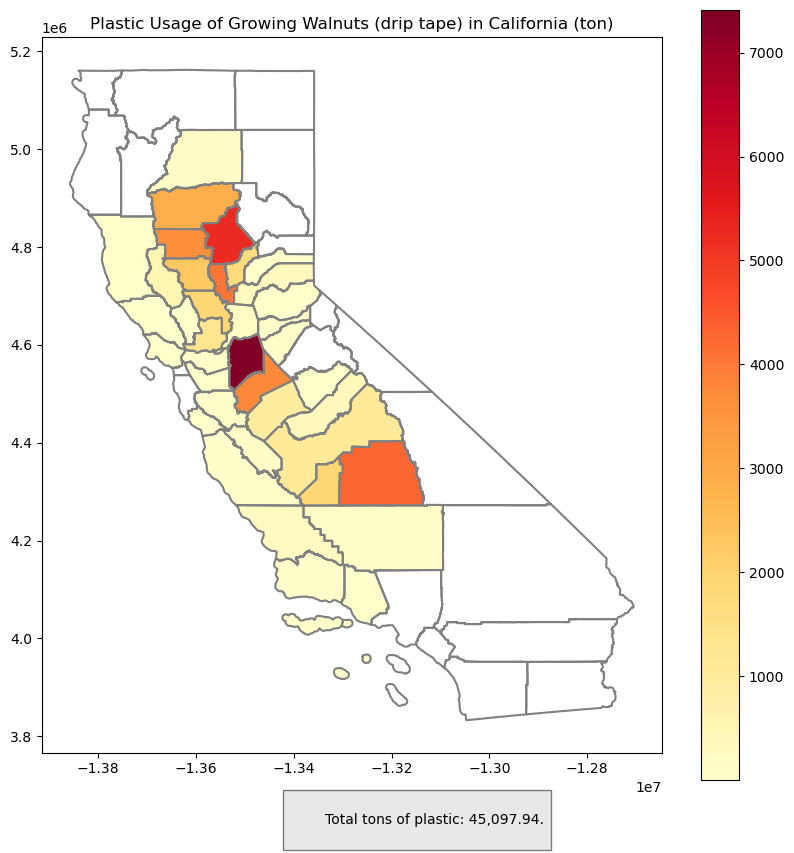

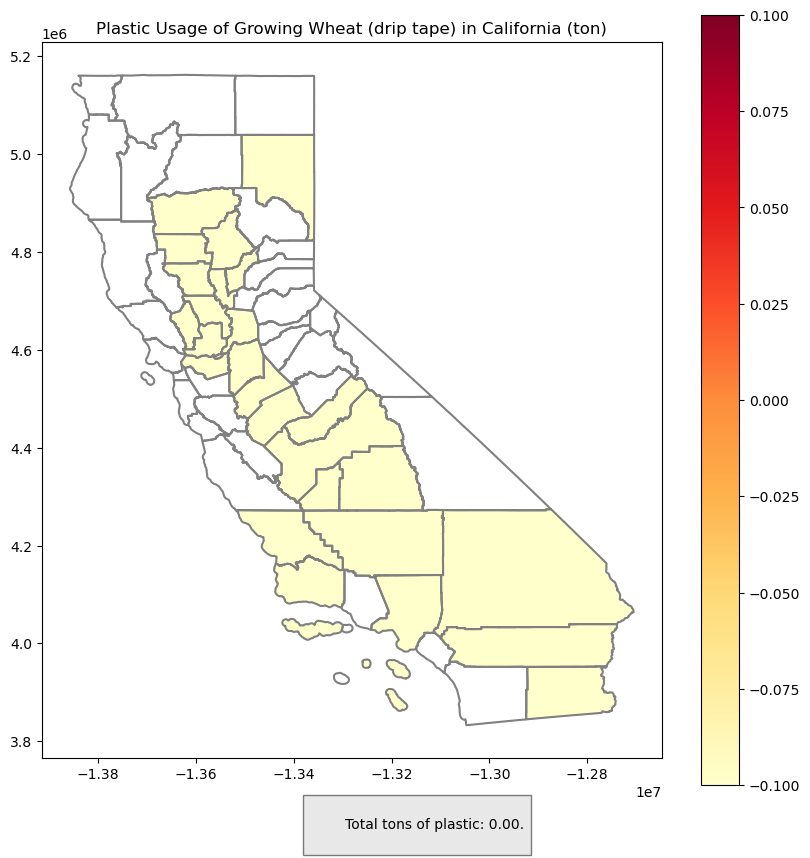

In [16]:
%%capture --no-display  
# ignore warnings for this snippet

dfs = []

for crop in crop_list:
    plastic_county = AgPlasticAggregation(crop, df_crop, boundary_county_CA)
    AgPlasticMappingCounty(plastic_county, boundary_county_CA)
    dfs.append(plastic_county)

## 2.2 Map: state-level

In [19]:
# Concatenate dfs into a single DataFrame
df_concat = pd.concat(dfs, axis=1)

# Perform the join
result = boundary_county_CA.merge(df_concat, left_on='NAME', right_on='COUNTY', how='left')

# result.columns

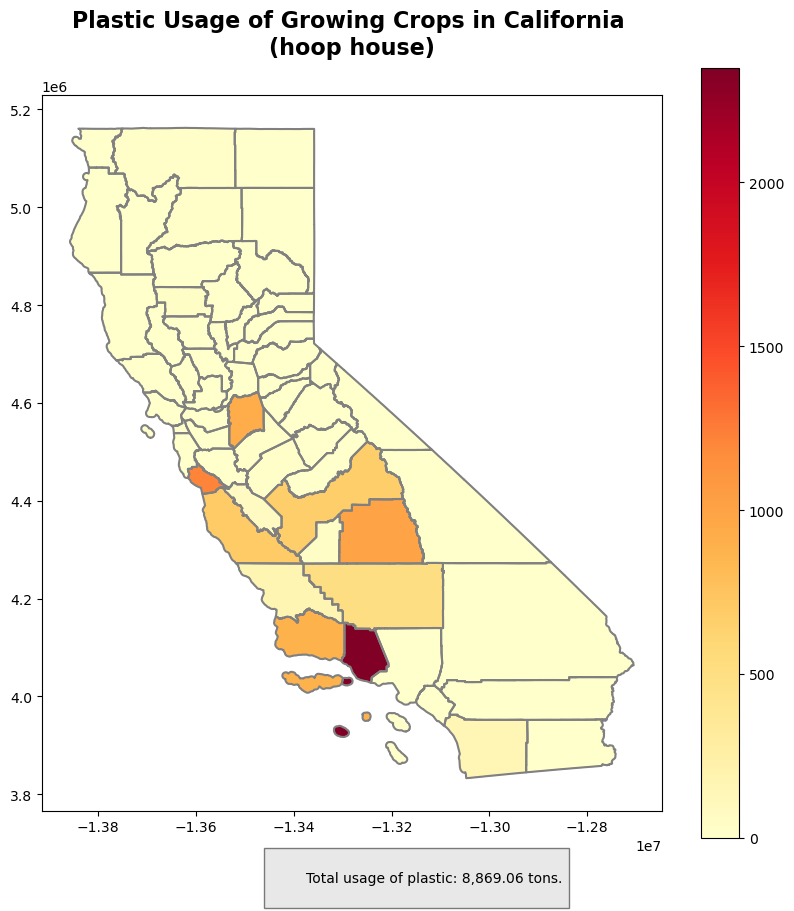

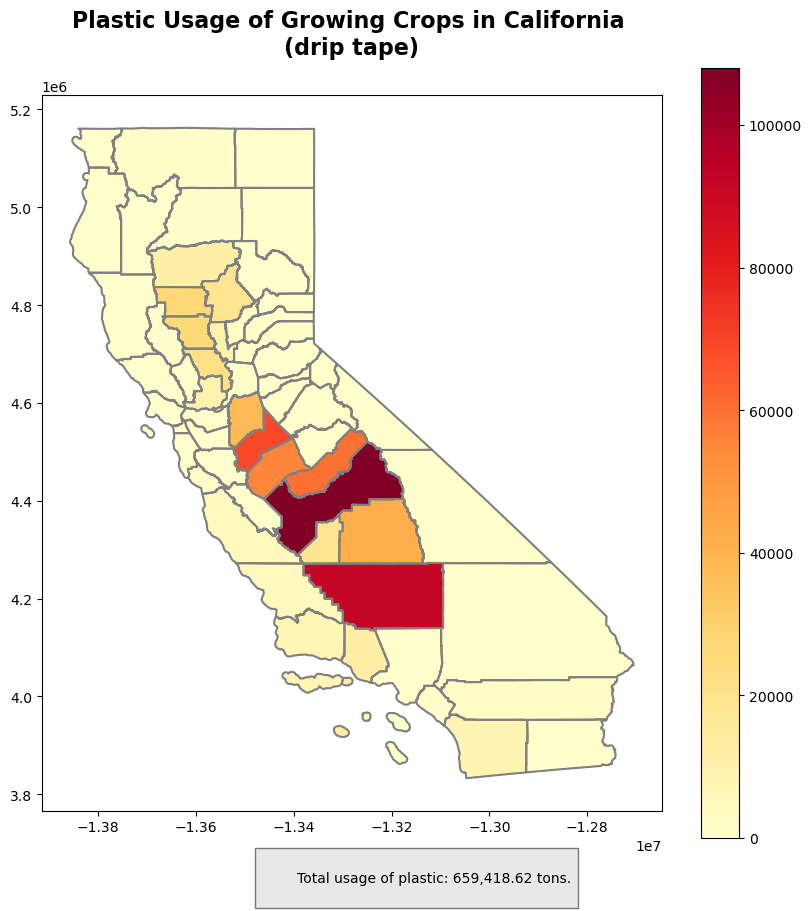

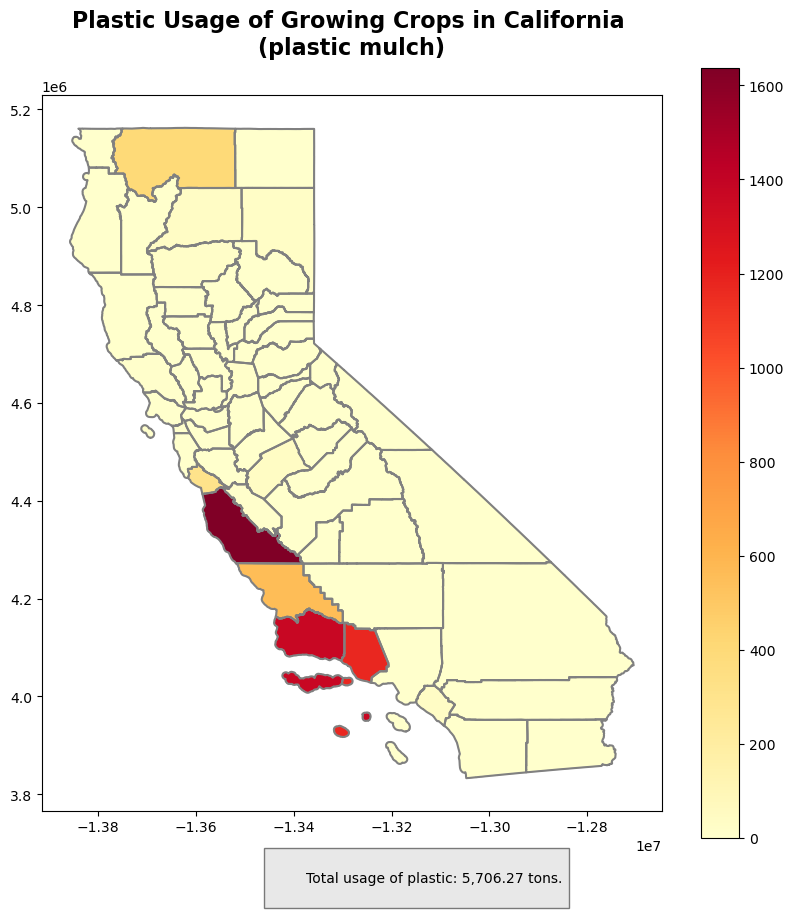

In [22]:
# add up plastic weight based on plastic category per county
for p_category in plastic_category_list:
    result[f'Total_Plastic_Weight_{p_category}'] = result.filter(like=f'{p_category}').filter(like='Weight').sum(axis=1)
    
    total_tons_of_plastic_category_state = result[f'Total_Plastic_Weight_{p_category}'].sum().round(2)
    # Format your paragraph
    report_result_category_state = f"""
        Total usage of plastic: {total_tons_of_plastic_category_state:,.2f} tons.
        """

    # Plot the GeoDataFrame
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))  # You can adjust the figure size as needed

    # Set a major title for the whole figure
    ax.set_title(f"Plastic Usage of Growing Crops in California \n({p_category})", fontsize=16, fontweight='bold', pad=30)

    result.plot(column=f'Total_Plastic_Weight_{p_category}', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    boundary_county_CA.boundary.plot(ax=ax, color='grey')

    # Add a note at the bottom of the figure
    plt.figtext(0.5, 0.05, report_result_category_state, ha="center", fontsize=10, bbox={"facecolor":"lightgrey", "alpha":0.5, "pad":5})
    # plt.savefig(f'output/map/Plastic_Map_{p_category}.jpg', dpi=300, bbox_inches='tight', format='jpeg')

    # Show the plot
    plt.show()

In [25]:
# add up all the plastic weight per county
# result['Total_Plastic_Acre'] = result.filter(like='ACRES').sum(axis=1) # this is meaningless if a farm uses multiple plastic categories
# result['Total_Plastic_Usage'] = result.filter(like='Usage').sum(axis=1)
result['Total_Plastic_Weight'] = result.filter(like='Total_Plastic_Weight_').sum(axis=1)
result.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,...,Plastic_Weight_Walnuts (drip tape),Plastic_Category_Walnuts (drip tape),ACRES_Wheat (drip tape),Plastic_Usage_Wheat (drip tape),Plastic_Weight_Wheat (drip tape),Plastic_Category_Wheat (drip tape),Total_Plastic_Weight_hoop house,Total_Plastic_Weight_drip tape,Total_Plastic_Weight_plastic mulch,Total_Plastic_Weight
0,06,091,00277310,06091,Sierra,Sierra County,06,H1,G4020,None,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
1,06,067,00277298,06067,Sacramento,Sacramento County,06,H1,G4020,472,...,225.865577,drip tape,5132.043502,49.555619,0.0,drip tape,0.765799,1146.402105,16.061900,1163.229805
2,06,083,00277306,06083,Santa Barbara,Santa Barbara County,06,H1,G4020,None,...,48.295438,drip tape,43.046341,0.415661,0.0,drip tape,881.438509,7222.880595,1369.746264,9474.065368
3,06,009,01675885,06009,Calaveras,Calaveras County,06,H1,G4020,None,...,96.249956,drip tape,NaN,NaN,NaN,NaN,0.000000,264.410125,0.369015,264.779139
4,06,111,00277320,06111,Ventura,Ventura County,06,H1,G4020,348,...,14.634023,drip tape,NaN,NaN,NaN,NaN,2348.161945,12712.223752,1173.870549,16234.256246


In [26]:
# total_acres_of_crop_state = grouped_gdf_county[f'ACRES_{crop}'].sum().round(2)
# total_acres_of_plastic_state = grouped_gdf_county[f'Plastic_Usage_{crop}'].sum().round(2)

total_tons_of_plastic_state = result['Total_Plastic_Weight'].sum().round(2)
# Format your paragraph
report_result_state = f"""
    Total usage of plastic: {total_tons_of_plastic_state:,.2f} tons.
    """

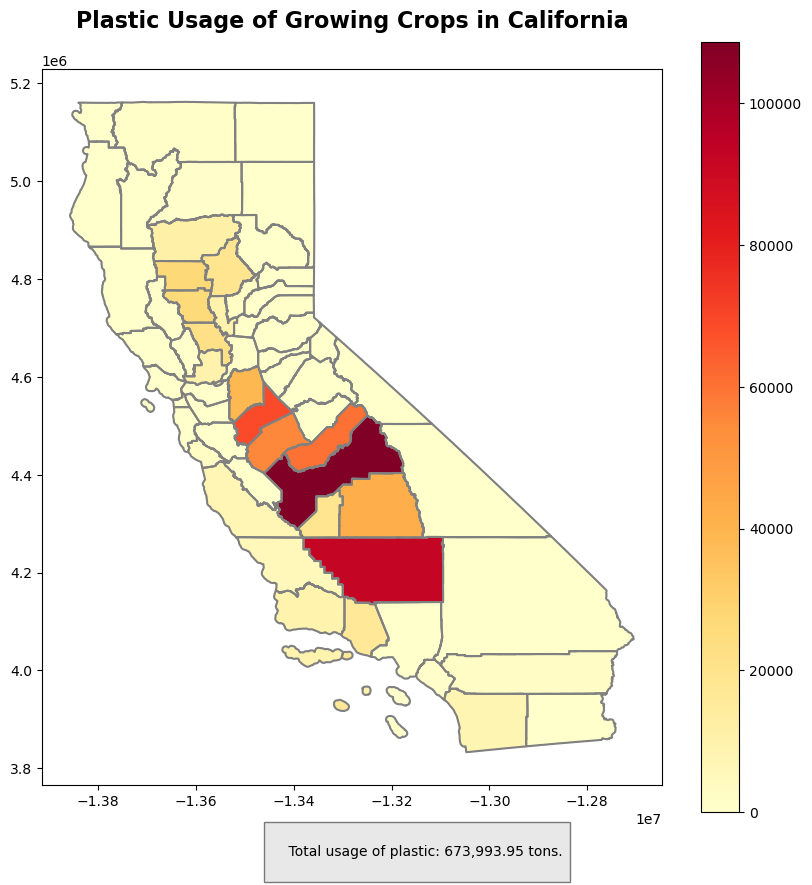

In [27]:
# Plot the GeoDataFrame
fig, ax = plt.subplots(1, 1, figsize=(10, 10))  # You can adjust the figure size as needed

# Set a major title for the whole figure
ax.set_title(f"Plastic Usage of Growing Crops in California", fontsize=16, fontweight='bold', pad=30)

result.plot(column='Total_Plastic_Weight', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
boundary_county_CA.boundary.plot(ax=ax, color='grey')


# Add a note at the bottom of the figure
plt.figtext(0.5, 0.05, report_result_state, ha="center", fontsize=10, bbox={"facecolor":"lightgrey", "alpha":0.5, "pad":5})

# # Adjust the subplot parameters to make room for the note
# plt.subplots_adjust(bottom=0.2)  # Adjusts the bottom parameter. Change this to fit your needs.

# plt.savefig(f'output/map/Plastic_Map_All_Crops.jpg', dpi=300, bbox_inches='tight', format='jpeg')

# Show the plot
plt.show()

In [29]:
# option to save the shp and csv
# result.to_file(f'output/shp/Plastic_Mapping_All_Crops.shp') 
# result.drop(columns=['geometry']).to_csv(f'output/Plastic_Mapping_All_Crops.csv')